In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os
import plotting

In [2]:
def createfig(nrows=2,figsize=(8,5),nraxs=2,hspace=0.6):
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(nrows=nrows, ncols=1, hspace=hspace)
    axs = [0]*nraxs
    
    for i in range(len(axs)):
        axs[i] = fig.add_subplot(gs[i])
    return fig,axs

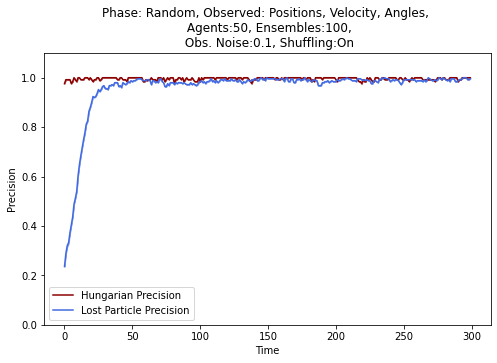

In [20]:
# Single Case Example for one Experiment

experiment = 'Random_1111_50_100_0.1_True'

fig,axs = createfig(nrows=1,nraxs=1)

plotting.plot_metric(axs[0],experiment,color='darkred',label='Hungarian Precision',legend=True)
plotting.plot_metric(axs[0],experiment,metric='Average LPP',label='Lost Particle Precision',legend=True)

plt.savefig(f'../saves/plots/{experiment}.pdf',bbox_inches='tight')

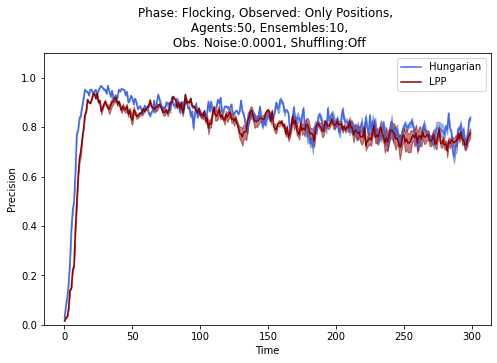

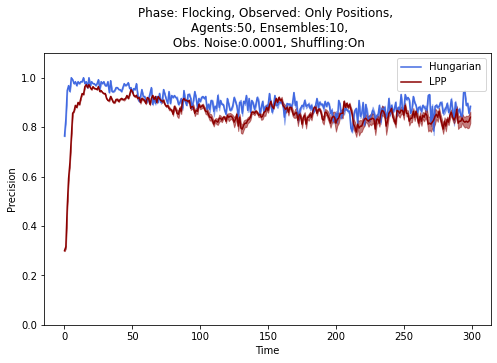

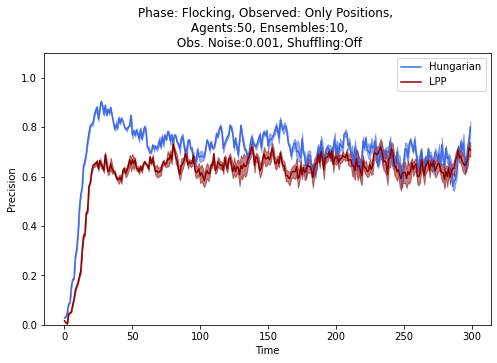

In [7]:
experiments = plotting.get_experiments(basepath='../../saves/',exptype='Flocking_1100')

for e in experiments[10:13]:
    
    fig,axs = createfig(nrows=1,nraxs=1)

    plotting.plot_metric(axs[0],e,label='Hungarian',legend=True)
    plotting.plot_metric(axs[0],e,metric='Average LPP',legend=True,color='darkred',label='LPP')
    del fig,axs

In [8]:
# The Parameter Ranges
import run_experiments

test_observable_axis = run_experiments.test_observable_axis
test_ensembles = run_experiments.test_ensembles
test_observation_noise = run_experiments.test_observation_noise
test_shuffle = run_experiments.test_shuffle

test_ensembles

[2, 10, 25, 50, 100]

In [9]:
def get_M(phase='Flocking',agents='50',obs='1111',shuffle='False'):
    """
    Input: Number of Agents, Sampling Rate and Observed Axis
    Output: Matrix for Imshow. X-Axis: Ensemble Size, Y-Axis: Measurement Noise, Color: Mean Precision
    """

    title = f'Phase: {phase} \nAgents: {agents}, Shuffling: {shuffle}'
    
    M = np.zeros([len(test_observation_noise),len(test_ensembles)])

    for i,nr_ensemble in enumerate(test_ensembles):

        for j,noise in enumerate(test_observation_noise):
      
            exp = f"{phase}_{obs}_{agents}_{nr_ensemble}_{noise}_{shuffle}"    

            mu,sig = plotting.get_metric_length(exp)
            M[len(test_observation_noise)-1-j,i] = mu


    return M, title 

In [10]:
def plot_M(ax,axcb,M,title=None,phase='Flocking',agents='100',obs='1111',shuffle='False'):
    """
    Input: Axis for plotting and for the colorbar, Matrix to be plotted
    """
    
    x1 = 0
    x2 = 5
    y1 = 1.125*np.log10(0.0001)
    y2 = 0.5
    
    show=ax.imshow(M,aspect='auto',cmap='RdBu',vmin=0,vmax=300,extent=(x1,x2,y1,y2))

    ax.set_xlabel('Kalman Ensemble Size')
    ax.set_xticks([0.5,1.5,2.5,3.5,4.5])
    ax.set_xticklabels(test_ensembles)

    ax.set_ylabel('Observation Noise (Log10)')
    ax.set_yticks(np.log10(test_observation_noise))
    
    ax.set_title(title,size=10)


    axcb.axis('off')
    cbar = fig.colorbar(show,ax=axcb,orientation='vertical',location='right',fraction=1)
    cbar.set_ticks([0,100,200,300])
    cbar.set_label('Avg. Consistent Tracking Duration',rotation=270,labelpad=12)
    return None

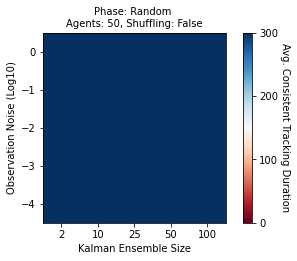

In [12]:
M,title = get_M(phase='Random',agents='50',obs='1111',shuffle='False')

fig = plt.figure(figsize=(4.4,3.5))
gs = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.15, width_ratios=[4,1])
axs = [0]*2
for i in range(len(axs)):
    axs[i] = fig.add_subplot(gs[i])

plot_M(axs[0],axs[1],M,title=title)

#plt.savefig('../saves/plots/matrix/Random_1111_shuffling=True.pdf',bbox_inches='tight')

In [26]:
np.mean(M)

299.0

### 1 D Visualisation (With Error bars)

In [33]:
def get_noise_dep(nr_ensembles,phase='Flocking',obs='1111',shuffle='False'):

    x_ax = test_observation_noise
    y_mu = []
    y_sig = []

    for noise in test_observation_noise:
        exp = f"{phase}_{obs}_50_{nr_ensembles}_{noise}_{shuffle}"  
        
        mu,sig = plotting.get_metric_length(exp)

        y_mu.append(mu)
        y_sig.append(sig)

    return x_ax,y_mu,y_sig


In [34]:
def plot_noise_dep(\
        ax,\
        nr_ensembles,\
        color='royalblue',\
        metric='Average Hungarian Precision',\
        phase='Flocking',\
        obs='1100',\
        shuffle='False'):

    title = f'Phase: {phase} \nAgents: 50, Shuffling: {shuffle}'
    
    x,y,ye = get_noise_dep(nr_ensembles,phase=phase,obs=obs,shuffle=shuffle)
    ax.scatter(x,y,color=color,s=12)
    ax.errorbar(x,y,yerr=ye,capsize=5,color=color,fmt="o")
    ax.set_xscale('log')

    ax.set_xlabel('Observation Noise')
    ax.set_ylabel('Avg. Consistent Tracking Duration')

    ax.set_ylim(0,310)

    ax.set_title(f'Ensembles: {nr_ensembles}')
    ax.grid()

    return None

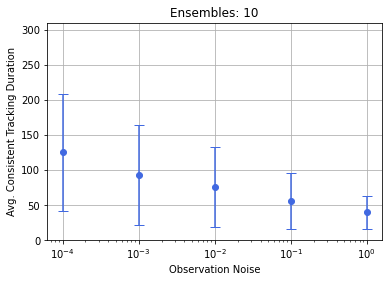

In [36]:
fig,ax = plt.subplots()
plot_noise_dep(ax,10,shuffle='True')

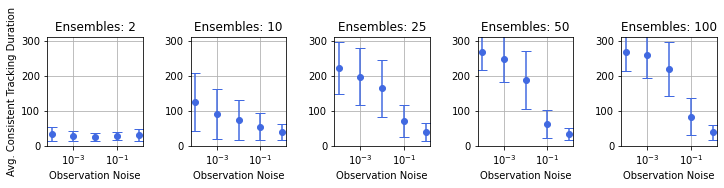

In [37]:
fig = plt.figure(figsize=(12,2))
gs = gridspec.GridSpec(nrows=1, ncols=5, wspace=0.5)
axs = [0]*5

for i in range(len(axs)):
    axs[i] = fig.add_subplot(gs[i])


for i,e in enumerate(test_ensembles):
    plot_noise_dep(axs[i],e,shuffle='True')

for j in [1,2,3,4]:
    axs[j].set_ylabel('')